# Final Project

Name: Dhruv Patel

Date: Dec 14th

Assignment: Final Dataset Project

Objective: Complete your analysis in your Jupyter Notebook, using Markdown cells to document your work and to clearly identify your questions.

# Questions:
1. What are the most popular beverage categories?
2. How do calories vary across beverage sizes?
3. What is the relationship between calories and total fat?
4. How does caffeine content vary across beverage categories?

In [55]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'starbucks.csv'  # Update the file path if needed
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [56]:
# Overview of the dataset
print("Shape of the dataset:", data.shape)
print("\nColumns and data types:\n", data.dtypes)
print("\nMissing values:\n", data.isnull().sum())


Shape of the dataset: (242, 18)

Columns and data types:
 Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

Missing values:
 Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)               

In [57]:
# Fill or drop missing values if necessary
data.dropna(inplace=True)
print("Shape after removing missing values:", data.shape)

# Convert any non-numeric columns if needed (example)
if 'Calories' in data.columns:
    data['Calories'] = pd.to_numeric(data['Calories'], errors='coerce')


Shape after removing missing values: (241, 18)


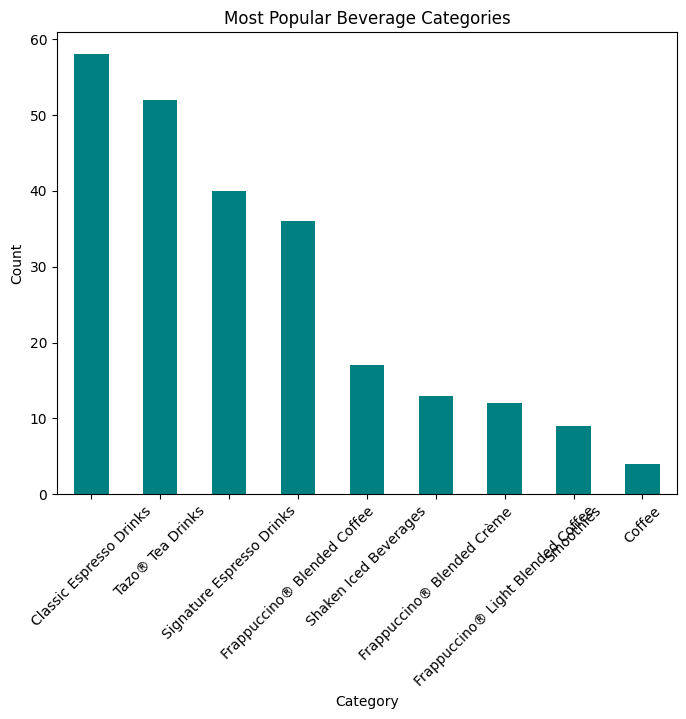

In [58]:
popular_categories = data['Beverage_category'].value_counts()

# Plotting the result
plt.figure(figsize=(8, 6))
popular_categories.plot(kind='bar', color='teal')
plt.title('Most Popular Beverage Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


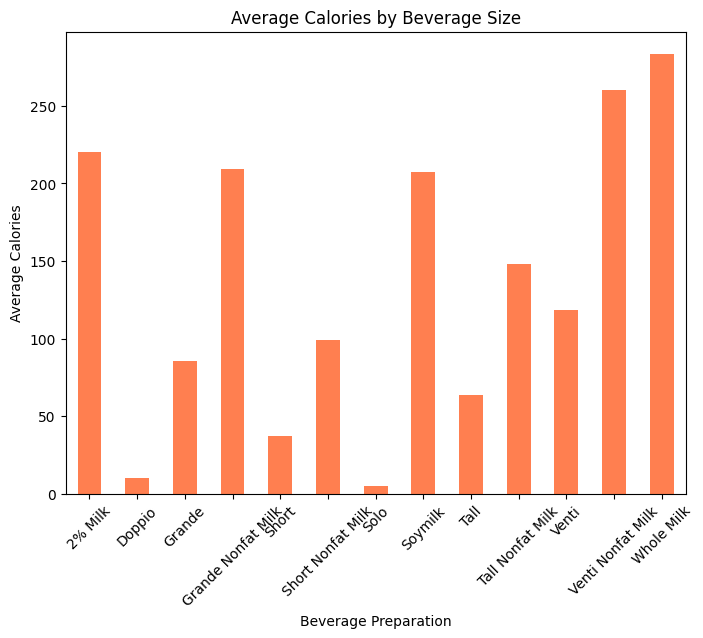

In [59]:
calories_size = data.groupby('Beverage_prep')['Calories'].mean()

# Plotting the result
plt.figure(figsize=(8, 6))
calories_size.plot(kind='bar', color='coral')
plt.title('Average Calories by Beverage Size')
plt.xlabel('Beverage Preparation')
plt.ylabel('Average Calories')
plt.xticks(rotation=45)
plt.show()


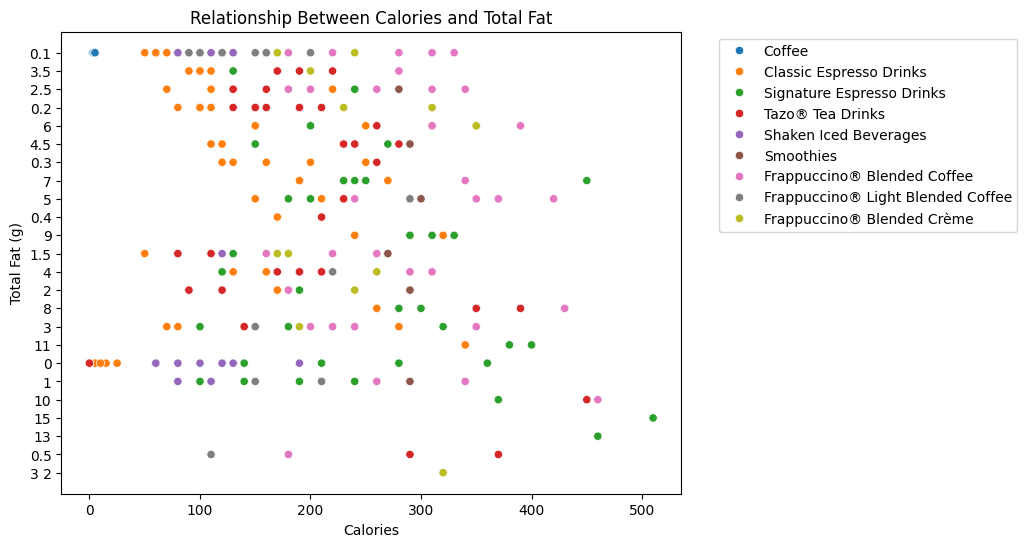

In [60]:
# Standardize column names
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Drop rows with missing values in relevant columns
data = data.dropna(subset=['Calories', 'Total_Fat_g'])

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Calories', y='Total_Fat_g', data=data, hue='Beverage_category')
plt.title('Relationship Between Calories and Total Fat')
plt.xlabel('Calories')
plt.ylabel('Total Fat (g)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

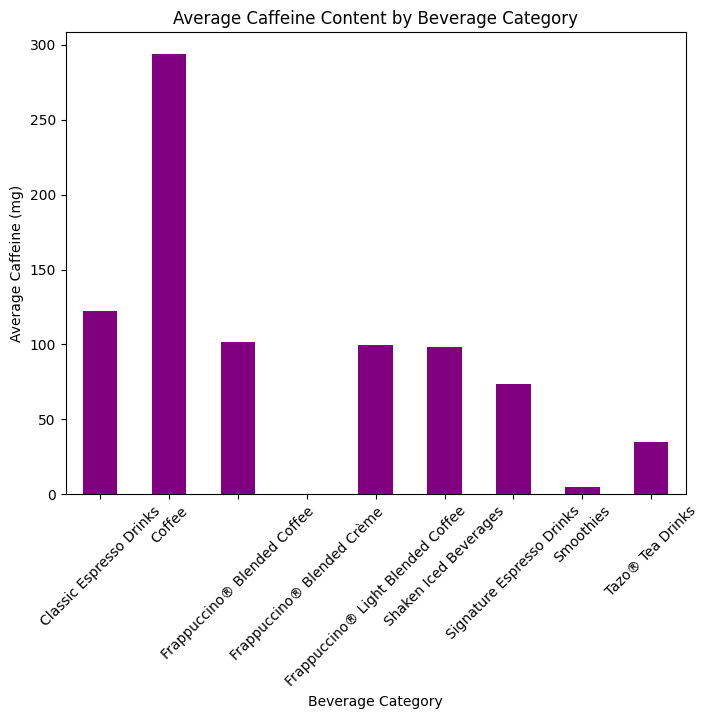

In [61]:
# Standardize column names
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Handle missing or NaN values in Caffeine_mg
data['Caffeine_mg'] = pd.to_numeric(data['Caffeine_mg'], errors='coerce')
data['Caffeine_mg'] = data['Caffeine_mg'].fillna(0)

# Group by Beverage_category and calculate mean caffeine content
caffeine_content = data.groupby('Beverage_category')['Caffeine_mg'].mean()

# Plot the result
plt.figure(figsize=(8, 6))
caffeine_content.plot(kind='bar', color='purple')
plt.title('Average Caffeine Content by Beverage Category')
plt.xlabel('Beverage Category')
plt.ylabel('Average Caffeine (mg)')
plt.xticks(rotation=45)
plt.show()
